# ***Placement Prediction System***

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, r2_score

## ***Load Dataset***

In [387]:
df = pd.read_csv('/content/student_dataset.csv')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,Salary
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced,0.0
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed,680922.0
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced,0.0
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed,540987.0
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed,636892.0


In [388]:
df.shape

(10000, 13)

In [389]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500,227408.848800
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527,280957.002343
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000,0.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000,0.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000,0.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000,497114.500000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000,775579.000000


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
 12  Salary                     10000 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage

## ***Exploratory Data Analysis***

<Axes: ylabel='CGPA'>

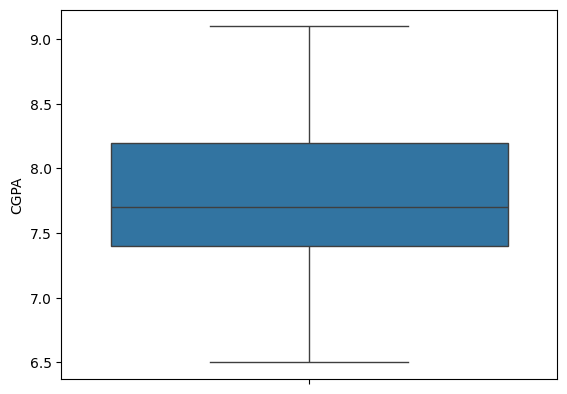

In [391]:
sns.boxplot(df['CGPA'])

<Axes: ylabel='Salary'>

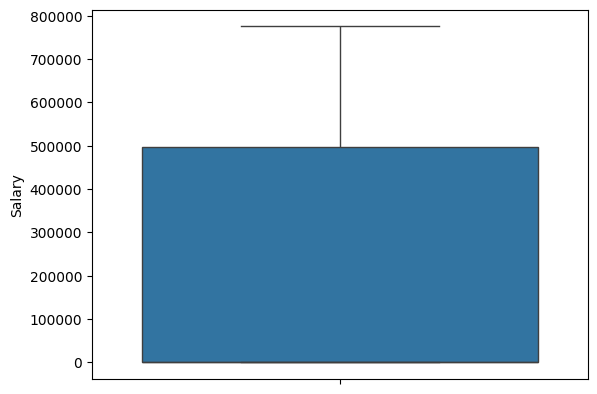

In [392]:
sns.boxplot(df['Salary'])

<Axes: xlabel='HSC_Marks', ylabel='Salary'>

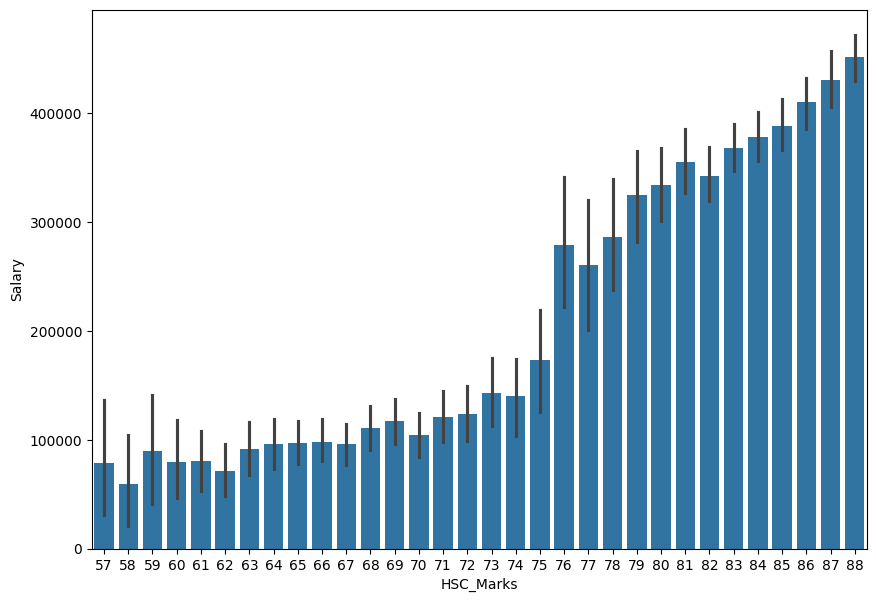

In [393]:
plt.figure(figsize=(10, 7))
sns.barplot(x='HSC_Marks',y='Salary',data=df)

In [394]:
df['SSC_HSC_Avg'] = (df['SSC_Marks'] + df['HSC_Marks']) / 2
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,Salary,SSC_HSC_Avg
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced,0.0,70.0
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed,680922.0,80.0
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced,0.0,79.5
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed,540987.0,80.5
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed,636892.0,81.0


In [395]:
df = df.drop(['SSC_Marks', 'HSC_Marks'], axis=1)
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,PlacementStatus,Salary,SSC_HSC_Avg
0,1,7.5,1,1,1,65,4.4,No,No,NotPlaced,0.0,70.0
1,2,8.9,0,3,2,90,4.0,Yes,Yes,Placed,680922.0,80.0
2,3,7.3,1,2,2,82,4.8,Yes,No,NotPlaced,0.0,79.5
3,4,7.5,1,1,2,85,4.4,Yes,Yes,Placed,540987.0,80.5
4,5,8.3,1,2,2,86,4.5,Yes,Yes,Placed,636892.0,81.0


In [396]:
df.drop(['StudentID'], axis=1, inplace=True)
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,PlacementStatus,Salary,SSC_HSC_Avg
0,7.5,1,1,1,65,4.4,No,No,NotPlaced,0.0,70.0
1,8.9,0,3,2,90,4.0,Yes,Yes,Placed,680922.0,80.0
2,7.3,1,2,2,82,4.8,Yes,No,NotPlaced,0.0,79.5
3,7.5,1,1,2,85,4.4,Yes,Yes,Placed,540987.0,80.5
4,8.3,1,2,2,86,4.5,Yes,Yes,Placed,636892.0,81.0


In [397]:
mapping = {'Yes': 1, 'No': 0, 'Placed': 1, 'NotPlaced': 0}

df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map(mapping)
df['PlacementTraining'] = df['PlacementTraining'].map(mapping)
df['PlacementStatus'] = df['PlacementStatus'].map(mapping)

df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,PlacementStatus,Salary,SSC_HSC_Avg
0,7.5,1,1,1,65,4.4,0,0,0,0.0,70.0
1,8.9,0,3,2,90,4.0,1,1,1,680922.0,80.0
2,7.3,1,2,2,82,4.8,1,0,0,0.0,79.5
3,7.5,1,1,2,85,4.4,1,1,1,540987.0,80.5
4,8.3,1,2,2,86,4.5,1,1,1,636892.0,81.0


<Axes: >

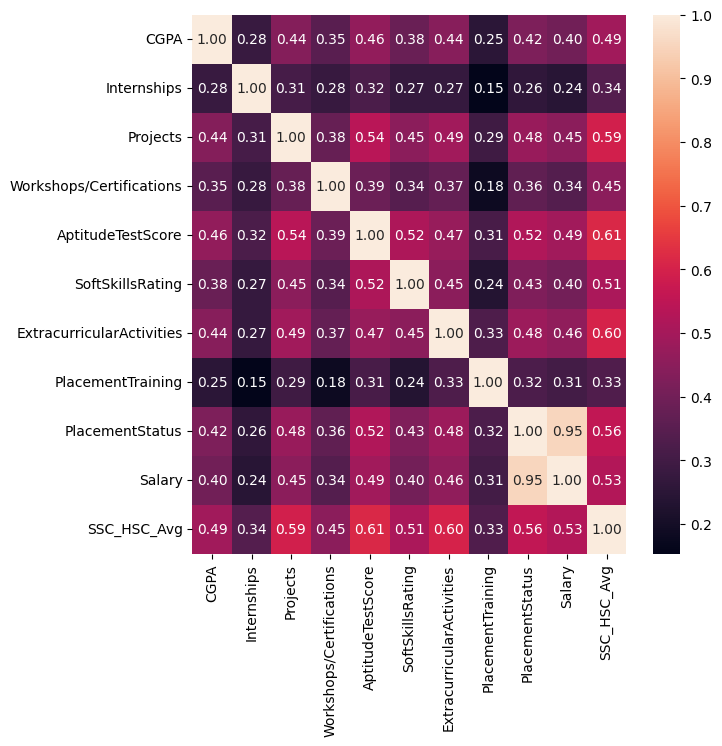

In [398]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

## ***Machine Learning***

### ***Predict whether the student is placed or not (Logistic Regression)***

In [399]:
df_new = df.drop(['Salary'], axis=1)
df_new.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,PlacementStatus,SSC_HSC_Avg
0,7.5,1,1,1,65,4.4,0,0,0,70.0
1,8.9,0,3,2,90,4.0,1,1,1,80.0
2,7.3,1,2,2,82,4.8,1,0,0,79.5
3,7.5,1,1,2,85,4.4,1,1,1,80.5
4,8.3,1,2,2,86,4.5,1,1,1,81.0


In [400]:
test_df = pd.DataFrame({
    'CGPA': [8.1],
    'Internships': [0],
    'Projects': [2],
    'Workshops/Certifications': [3],
    'AptitudeTestScore': [80],
    'SoftSkillsRating': [4.8],
    'ExtracurricularActivities': [1],
    'PlacementTraining': [0],
    'SSC_HSC_Avg': [86.6],
})

In [401]:
model = LogisticRegression(max_iter=1000)

X = df_new.drop('PlacementStatus', axis=1)
y = df_new['PlacementStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
model.fit(X_train, y_train)

print('Accuracy:', model.score(X_test, y_test))
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)

Accuracy: 0.7945
Slope: [0.39354602 0.01446007 0.26103773 0.12494039 0.06935337 0.74883292
 0.68955003 0.91068003 0.05782531]
Intercept: [-18.28266324]


In [402]:
prediction = model.predict(test_df)
print(prediction)

[1]


***Export Pickle***

In [403]:
pickle.dump(model, open('Placement.pkl', "wb" ))

### ***Optimize***

### ***Predict Salary (Linear Regression)***

In [404]:
placed = pd.DataFrame({'PlacementStatus': prediction})
test_df = pd.concat([test_df, placed], axis=1)
test_df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_HSC_Avg,PlacementStatus
0,8.1,0,2,3,80,4.8,1,0,86.6,1


In [405]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,PlacementStatus,Salary,SSC_HSC_Avg
0,7.5,1,1,1,65,4.4,0,0,0,0.0,70.0
1,8.9,0,3,2,90,4.0,1,1,1,680922.0,80.0
2,7.3,1,2,2,82,4.8,1,0,0,0.0,79.5
3,7.5,1,1,2,85,4.4,1,1,1,540987.0,80.5
4,8.3,1,2,2,86,4.5,1,1,1,636892.0,81.0


In [406]:
model = LinearRegression()

X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

print('Accuracy:', model.score(X_test, y_test))
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)

Accuracy: 0.9073039609293828
Slope: 686.1663289658645
Intercept: 21273.142017036123


In [407]:
feature_order = X.columns.tolist()
test_df = test_df[feature_order]

In [408]:
salary = model.predict(test_df)
print(salary)

[546414.51132962]


In [409]:
# print(mean_absolute_error(y, y_pred))

***Export Pickle***

In [410]:
pickle.dump(model, open('Salary.pkl', "wb" ))
pickle.dump(X, open('X.pkl', 'wb'))

### ***Optimize***

In [411]:
# mse = mean_squared_error(test_df, prediction)
# mse